In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
data=pd.read_csv('Downloads/Add_sales_data_2018.csv')
data

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


In [74]:
data.shape

(205, 7)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [151]:
data=data.astype(float)

In [152]:
data.describe()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,0.0,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,NaN,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,NaN,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,NaN,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,NaN,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,NaN,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,NaN,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,NaN,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

<AxesSubplot:>

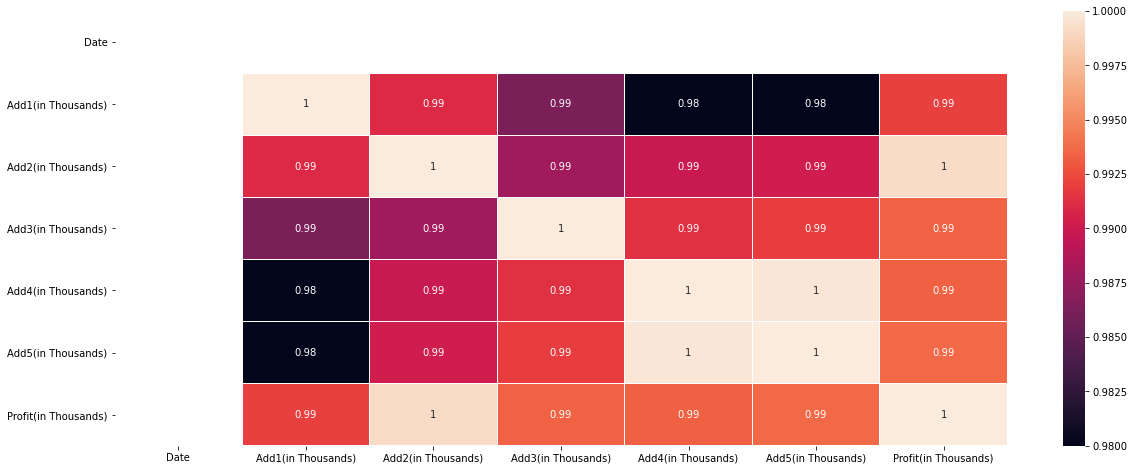

In [153]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.98,vmax=1,annot=True,linewidth=0.2)

In [154]:
C=data[['Add1(in Thousands)','Add2(in Thousands)','Add3(in Thousands)','Add4(in Thousands)','Add5(in Thousands)','Profit(in Thousands)']]

In [155]:
Corr=C.corr()
Corr

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [275]:
data=data.drop('Date',axis=1)

In [276]:
#to remove highly correlated value
data1=data.drop(['Add5(in Thousands)'],axis=1)


In [277]:
#split data into dependent and independent data
y=data1['Profit(in Thousands)']
X=data1.drop(['Profit(in Thousands)'],axis=1)

In [278]:
X.shape

(205, 4)

In [279]:
#to split data into tet and train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

In [280]:
#to make linear regression model
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [281]:
#fitttng the instincts creatd to the training data
model=lr.fit(X_train,y_train)

In [282]:
predictions=model.predict(X_test)


In [283]:
from sklearn.metrics import mean_squared_error
print('MSE is',mean_squared_error(y_test,predictions))

MSE is 0.538164044375497


# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

Add1(in Thousands)-290

Add2(in Thousands)-312

Add3(in Thousands)-309

Add4(in Thousands)-298

Add5(in Thousands)-320

In [314]:
make_predict=[[290,312,309,298]]

In [313]:
model.predict(make_predict).item()


5801.736693174623